# Tools for Data Science 
# Dimension Reduction - Activity


In [69]:
# imports and setup 

import numpy as np

import pandas as pd
pd.set_option('display.notebook_repr_html', False)

from sklearn.datasets import load_iris, load_digits
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import homogeneity_score, v_measure_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

import seaborn as sns

In this activity we will consider an RNA data set taken from [here](https://www.nature.com/articles/s41592-019-0425-8). This data set contains genetic information on 296 different cells, recording 3000 distinct gene counts/features for each cell. The cells were synthetically generated in various mixtures (7 different cell types) so that ground truth cell type information is in fact available. Note this data has already been imputed and scaled, so you don't need to rescale.

In [70]:
# Read in the data
rna_data = pd.read_csv("rnamix1_SCT.csv")
rna_labels = pd.read_csv("rnamix1_labels.csv",index_col=0)
print(rna_data.info())
print(rna_data.head())
rna_labels

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Columns: 3000 entries, ENSG00000019582 to ENSG00000116560
dtypes: float64(3000)
memory usage: 6.8 MB
None
   ENSG00000019582  ENSG00000132432  ENSG00000234745  ENSG00000146648  \
0         4.317488         3.135494         4.382027         2.397895   
1         3.258097         4.382027         3.135494         3.688879   
2         3.465736         4.844187         3.496508         4.007333   
3         3.332205         5.017280         3.465736         4.025352   
4         3.332205         5.111988         3.526361         4.060443   

   ENSG00000108602  ERCC-00130  ERCC-00096  ERCC-00002  ERCC-00046  \
0         3.806662    3.713572    3.496508    3.610918    2.995732   
1         2.564949    5.043425    4.836282    4.875197    4.077537   
2         2.890372    4.442651    4.110874    4.262680    3.433987   
3         2.890372    4.369448    4.094345    4.262680    3.465736   
4         2.833213    4.406719   

            CellType
CellNumber          
1                  1
2                  2
3                  2
4                  2
5                  2
...              ...
292                7
293                7
294                7
295                7
296                7

[296 rows x 1 columns]

(1) Make a 2-dimensional PCA plot of the data, and color it by the cell types. 

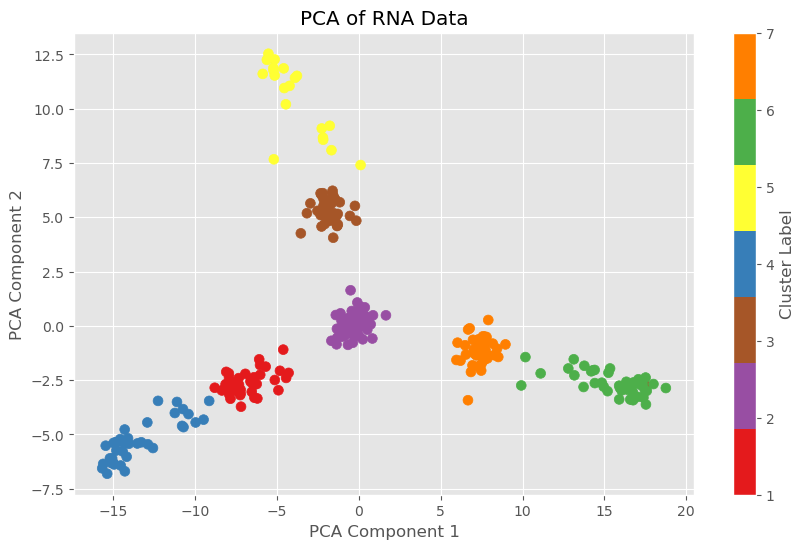

In [71]:
# Your code goes here
pca_model = PCA(n_components=2)
X_PCA_2 = pca_model.fit_transform(rna_data)

# Plot the PCA results
cmap1 = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])
plt.figure(figsize=(10, 6))
plt.scatter(X_PCA_2[:, 0], X_PCA_2[:, 1], c=rna_labels['CellType'].values, cmap=cmap1, s=50)
plt.title('PCA of RNA Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

(2) What percentage of the variance is captured by the first 2 PC's? Make a plot showing the decay of the variance explained by the first 100 PC's. How many PC's would you need to capture 90% of the variance?

Explained variance ratio for 100 components: [2.76456119e-01 6.70078902e-02 3.15827691e-02 1.21257136e-02
 9.45516509e-03 6.76412797e-03 5.45229706e-03 4.92908544e-03
 4.69705368e-03 4.45836248e-03 4.24097249e-03 4.09819393e-03
 4.04083208e-03 3.98434129e-03 3.89764362e-03 3.86767110e-03
 3.85160624e-03 3.83208954e-03 3.76831638e-03 3.74598710e-03
 3.70035838e-03 3.65089982e-03 3.60135488e-03 3.57732487e-03
 3.56288059e-03 3.52845195e-03 3.51770654e-03 3.51209604e-03
 3.49604872e-03 3.47123437e-03 3.44264893e-03 3.38996850e-03
 3.37995499e-03 3.34733874e-03 3.32881484e-03 3.31622703e-03
 3.28514328e-03 3.27205030e-03 3.26238409e-03 3.24097131e-03
 3.21485160e-03 3.19399775e-03 3.17837058e-03 3.17028185e-03
 3.13389188e-03 3.11575568e-03 3.10212405e-03 3.09066404e-03
 3.08328682e-03 3.07409488e-03 3.05648673e-03 3.04289997e-03
 3.03119225e-03 3.00872959e-03 2.98607127e-03 2.97486883e-03
 2.93895118e-03 2.92933938e-03 2.91612491e-03 2.90254047e-03
 2.89628054e-03 2.87382965e-03 2.8695010

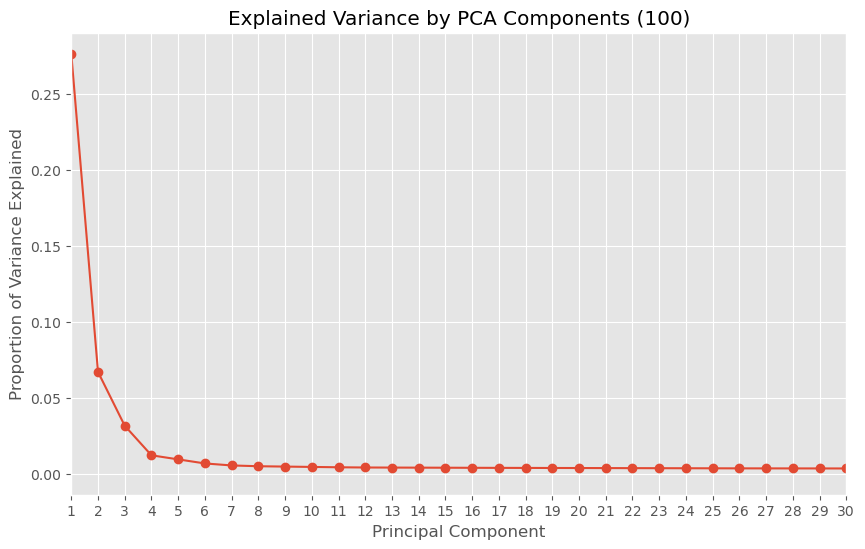

Explained variance ratio for first 2 components: 0.3434640086810461
Explained variance ratio for first 10 components: 0.4229285830917143
Explained variance ratio for first 50 components: 0.5624974141419402
Explained variance ratio for first 100 components: 0.6977196773593168
Number of components needed to achieve 90% variance: 207


In [72]:
# Variance from first 100 PCA components & plot
pca_model_296 = PCA(n_components=296)
X_PCA_296 = pca_model_296.fit_transform(rna_data)
variance_ratio_296 = pca_model_296.explained_variance_ratio_
print(f"Explained variance ratio for 100 components: {variance_ratio_296}")
components_296 = range(1, 297)
plt.plot(components_296, variance_ratio_296, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xticks(components_296)
plt.xlim(1, 30)
plt.title('Explained Variance by PCA Components (100)')
plt.show()

# Variance from first various PCA components & compare
first_2_variance = np.sum(pca_model_296.explained_variance_ratio_[:2])
first_10_variance = np.sum(pca_model_296.explained_variance_ratio_[:10])
first_50_variance = np.sum(pca_model_296.explained_variance_ratio_[:50])
first_100_variance = np.sum(pca_model_296.explained_variance_ratio_[:100])
print(f"Explained variance ratio for first 2 components: {first_2_variance}")
print(f"Explained variance ratio for first 10 components: {first_10_variance}")
print(f"Explained variance ratio for first 50 components: {first_50_variance}")
print(f"Explained variance ratio for first 100 components: {first_100_variance}")

# To achieve 90% variance, we need to find the number of components
goal_variance = 0
i = 0
# Loop until we reach 90% variance
while (goal_variance < 0.90):
    goal_variance += pca_model_296.explained_variance_ratio_[i]
    i += 1
print(f"Number of components needed to achieve 90% variance: {i}")


(3) Calculate the v_measure_score obtained by running kmeans with k = 7 on the 2-dimensional PCA plot. Can you achieve a higher score by using more PCs?

In [ ]:
# KMeans clustering
k_means_model = KMeans(n_clusters = 7, random_state=0, n_init="auto").fit(X_PCA_2)
print(rna_labels, rna_labels.shape)
labels_true = rna_labels.squeeze() # Changes the labels dataframe to a numpy array (to work with the vscore function)
print(labels_true.shape, k_means_model.labels_.shape) # Should both be 296 x 1 (1D)
vscore_2d = v_measure_score(labels_true= labels_true, labels_pred=k_means_model.labels_)
print(f"V-measure score for KMeans on PCA-reduced data: {vscore_2d:.3f}")


# Higher score attempt
pca_more = PCA(n_components=10).fit_transform(rna_data)
kmeans_more = KMeans(n_clusters=7, random_state=0, n_init='auto').fit(pca_more)
vscore_more = v_measure_score(labels_true, kmeans_more.labels_)
print(f"V-score with 10 PCs: {vscore_more:.3f}")

            CellType
CellNumber          
1                  1
2                  2
3                  2
4                  2
5                  2
...              ...
292                7
293                7
294                7
295                7
296                7

[296 rows x 1 columns] (296, 1)
(296,) (296,)
V-measure score for KMeans on PCA-reduced data: 0.927
V-score with 10 PCs: 0.836


In this case, KMeans seems to perform better on the 2D PCA-reduced data. While higher-dimensional data might contain more information, it can also introduce noise and make clustering less effective due to the curse of dimensionality. PCA likely helped by capturing the most important variance and removing less meaningful features.